# Trade-Ahead-Prediction  

## Objective  
This project focuses on analyzing stock price data and financial indicators for companies listed on the New York Stock Exchange (NYSE). The goal is to group stocks based on their characteristics using clustering techniques and provide actionable insights into the features of each group.  

Trade&Ahead, a financial consultancy firm, aims to use this analysis to deliver personalized investment strategies to its customers.  

---

## Data Description  
The dataset contains information on stock prices and financial indicators such as ROE, earnings per share, and P/E ratio. Below is a summary of the data fields:  

- **Ticker Symbol**: Abbreviation used to uniquely identify publicly traded shares of a particular stock on a stock market.  
- **Company**: Name of the company.  
- **GICS Sector**: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations.  
- **GICS Sub Industry**: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations.  
- **Current Price**: Current stock price in dollars.  
- **Price Change**: Percentage change in the stock price in 13 weeks.  
- **Volatility**: Standard deviation of the stock price over the past 13 weeks.  
- **ROE**: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt).  
- **Cash Ratio**: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities.  
- **Net Cash Flow**: The difference between a company's cash inflows and outflows (in dollars).  
- **Net Income**: Revenues minus expenses, interest, and taxes (in dollars).  
- **Earnings Per Share**: Company's net profit divided by the number of common shares it has outstanding (in dollars).  
- **Estimated Shares Outstanding**: The number of shares of the company's stock currently held by all its shareholders.  
- **P/E Ratio**: Ratio of the company's current stock price to the earnings per share.  
- **P/B Ratio**: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities).  

---

## Exploratory Data Analysis (EDA) Questions  

1. **What does the distribution of stock prices look like?**  
   Analyze the spread and skewness of stock prices to understand pricing patterns.  

2. **The stocks of which economic sector have seen the maximum price increase on average?**  
   Identify sectors showing significant growth trends based on price changes.  

3. **How are the different variables correlated with each other?**  
   Use correlation analysis to identify relationships between financial indicators (e.g., ROE, P/E Ratio) and stock performance.  

4. **How does the average cash ratio vary across economic sectors?**  
   Examine the ability of companies in each sector to meet short-term obligations using cash equivalents.  

5. **How does the P/E ratio vary, on average, across economic sectors?**  
   Analyze P/E ratios to determine how investors value stocks in different sectors relative to earnings.  

---

In [60]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# # Import standard scalar
from sklearn.preprocessing import StandardScaler

# distances
from scipy.spatial.distance import cdist, pdist

# Lib To  perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
# Set pandas display option to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [61]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
path='/content/drive/MyDrive/Python Course'

In [63]:
# store pellete for future use
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

## **Data Overview**

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data
- Check for missing values
- Check for null values

In [64]:
# load the data in to panda dataframe
trad_df=pd.read_csv(f'{path}/stock_data.csv')

In [65]:
# Deep copy the dataframe to avoid chnage to orginal one
trade_ahead_df=trad_df.copy(deep=True)

In [66]:
# Detail info about the dataset
trade_ahead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [67]:
# shape of dataframe
trade_ahead_df.shape

(340, 15)

There are 340 rows and 15 columns

In [68]:
trade_ahead_df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.35,10.00,1.69,135,51,-604000000,7610000000,11.39,668129938.50,3.72,-8.78
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.24,8.34,2.20,130,77,51000000,5144000000,3.15,1633015873.00,18.81,-8.75
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.91,11.30,1.27,21,67,938000000,4423000000,2.94,1504421769.00,15.28,-0.39
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.94,13.98,1.36,9,180,-240840000,629551000,1.26,499643650.80,74.56,4.20
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32,-1.83,1.70,14,272,315120000,696878000,0.31,2247993548.00,178.45,1.06


### Observations

- **Total Entries:** `340`  
- **Total Columns:** `15`  

#### **Column Details:**

1. **`Ticker Symbol`**  
   - **Type:** `Object` (String)  

2. **`Security`**  
   - **Type:** `Object` (String)  

3. **`GICS Sector`**  
   - **Type:** `Object` (String)  

4. **`GICS Sub Industry`**  
   - **Type:** `Object` (String)  

5. **`Current Price`**  
   - **Type:** `Float`  

6. **`Price Change`**  
   - **Type:** `Float`  

7. **`Volatility`**  
   - **Type:** `Float`  

8. **`ROE`**  
   - **Type:** `Int`  

9. **`Cash Ratio`**  
   - **Type:** `Int`  

10. **`Net Cash Flow`**  
    - **Type:** `Int`  

11. **`Net Income`**  
    - **Type:** `Int`  

12. **`Earnings Per Share`**  
    - **Type:** `Float`  

13. **`Estimated Shares Outstanding`**  
    - **Type:** `Float`  

14. **`P/E Ratio`**  
    - **Type:** `Float`  

15. **`P/B Ratio`**  
    - **Type:** `Float`  

### Summary
- **Total Categorical Columns:** 4
- **Total Numerical Columns:** 11

In [69]:
# Stats summary of number fields
trade_ahead_df.describe(include='number').T


,count,mean,std,min,25%,50%,75%,max
Current Price,340.00,80.86,98.06,4.50,38.55,59.70,92.88,1274.95
Price Change,340.00,4.08,12.01,-47.13,-0.94,4.82,10.70,55.05
Volatility,340.00,1.53,0.59,0.73,1.13,1.39,1.70,4.58
ROE,340.00,39.60,96.55,1.00,9.75,15.00,27.00,917.00
Cash Ratio,340.00,70.02,90.42,0.00,18.00,47.00,99.00,958.00
Net Cash Flow,340.00,55537620.59,1946365312.18,-11208000000.00,-193906500.00,2098000.00,169810750.00,20764000000.00
Net Income,340.00,1494384602.94,3940150279.33,-23528000000.00,352301250.00,707336000.00,1899000000.00,24442000000.00
Earnings Per Share,340.00,2.78,6.59,-61.20,1.56,2.90,4.62,50.09
Estimated Shares Outstanding,340.00,577028337.75,845849595.42,27672156.86,158848216.10,309675137.80,573117457.32,6159292035.00
P/E Ratio,340.00,32.61,44.35,2.94,15.04,20.82,31.76,528.04


### Observations:
- **Current Price:**
  The prices vary significantly, ranging from 4.50 to 1,274.95, with a high standard deviation of 98.06.
  The median (59.70) is much lower than the mean (80.86), indicating potential outliers on the higher end.

- **Price Change:**
  Most price changes are small, with a median of 4.82 and an interquartile range (IQR) from -0.94 to 10.70.
  The negative minimum value (-47.13) suggests some stocks experienced significant price drops, while others had sharp increases (maximum of 55.05).
  
- **Volatility:**
  Volatility is relatively low overall, with a mean of 1.53 and a small range (0.73 to 4.58).
  Most values fall between 1.13 (25th percentile) and 1.70 (75th percentile).
  
- **Return on Equity (ROE):**
  ROE has an extremely wide range, from 1.00 to 917.00, and a high standard deviation (96.55).
  A median of 15.00 suggests most companies have moderate ROE, but some outliers have exceptionally high values.

- **Cash Ratio:**
  The median cash ratio is 47.00, suggesting companies generally have enough cash to cover short-term liabilities.
  However, the high maximum (958.00) and large standard deviation (90.42) indicate outliers with significant cash reserves.

- **Net Cash Flow:**
  The mean (55.54 million) is heavily influenced by extreme values, with a range from -11.2 billion to 20.8 billion .
  The median (2.10 million) is much smaller, highlighting the skewed distribution.

- **Net Income:**
  Similar to cash flow, net income has a wide range from -23.5 billion to 24.4 billion, with a median of 707.3 million.
  The mean (1.49 billion) is higher, again influenced by a few high-performing companies.

- **Earnings Per Share (EPS):**
  EPS varies widely, from -61.20 to 50.09, with a median of 2.90.
  A mean of 2.78 and relatively high standard deviation (6.59) indicate a few companies with extreme negative or positive earnings.
  
- **Estimated Shares Outstanding:**
  Share counts vary significantly, from ~27.7 million to ~6.16 billion, with a median of ~309.7 million.
  The large range and high standard deviation (845.85 million) reflect diverse company sizes.

- **P/E Ratio:**
  The average P/E ratio is 32.61, but the range (2.94 to 528.04) suggests a mix of undervalued and overvalued stocks.
  The median (20.82) indicates most stocks are moderately priced relative to earnings.

- **P/B Ratio:**
  The mean P/B ratio is negative (-1.72), driven by outliers on the lower end (-76.12), indicating some companies have significant liabilities or low equity.
  Most values are within the IQR (-4.35 to 3.92), with a median of -1.07.

In [70]:
# Summary of object fields
trade_ahead_df.describe(include='object').T


,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,American Airlines Group,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


### Observations:
- **Security and Ticker Symbol:**
  Each security name is unique which is similar to Ticker Symbol

- **GICS Sector:**
  There are 11 unique sectors in total, with the Industrials sector being the most represented (53 companies).
  This suggests a strong focus on industrials within the dataset.
- **GICS Sub-Industry:**
  The dataset includes 104 unique sub-industries, with Oil & Gas Exploration & Production being the largest group (16 companies).
  This indicates a relatively broad distribution of companies across sub-industries, but some sub-industries (like oil & gas) are more prevalent.

#### Quick Check On Data

In [71]:
# Check for duplicates in dataset
has_duplicates = trade_ahead_df.duplicated().any()

print(f"Does the DataFrame have duplicates? {has_duplicates}")

Does the DataFrame have duplicates? False


In [72]:
# check for null values
trade_ahead_df.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


In [73]:
# check for missing value
trade_ahead_df.isna().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


### Observations:
No missing value or null value

In [74]:
# Unique values of sector
trade_ahead_df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Staples', 'Utilities', 'Financials', 'Real Estate',
       'Materials', 'Consumer Discretionary', 'Energy',
       'Telecommunications Services'], dtype=object)

In [75]:
# Unique values of industry
trade_ahead_df['GICS Sub Industry'].unique()

array(['Airlines', 'Pharmaceuticals', 'Health Care Equipment',
       'Application Software', 'Semiconductors', 'Agricultural Products',
       'Data Processing & Outsourced Services', 'MultiUtilities',
       'Electric Utilities', 'Life & Health Insurance',
       'Property & Casualty Insurance', 'REITs', 'Multi-line Insurance',
       'Insurance Brokers', 'Internet Software & Services',
       'Specialty Chemicals', 'Building Products', 'Biotechnology',
       'Semiconductor Equipment', 'Electrical Components & Equipment',
       'Asset Management & Custody Banks', 'Specialized REITs',
       'Internet & Direct Marketing Retail', 'Specialty Stores',
       'Managed Health Care', 'Oil & Gas Exploration & Production',
       'Electronic Components', 'Aerospace & Defense',
       'Home Entertainment Software', 'Residential REITs',
       'Water Utilities', 'Consumer Finance', 'Banks',
       'Oil & Gas Equipment & Services', 'Metal & Glass Containers',
       'Health Care Distributors',

### Utils

In [76]:
def plot_bar_chart_percentage(df, column_name, xlabel, pellete, bar_width=0.6):
    """
    Plots the percentage distribution of a specified categorical column in a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: The name of the column to analyze.
    - colors: List of colors for the bar plot.
    - figsize: Tuple specifying the figure size.
    - bar_width: Width of the bars in the bar plot.
    """
    # Calculate the percentage of each category in the specified column
    percentages = df[column_name].value_counts(normalize=True)*100
    percentages = percentages.reset_index().rename(columns={ column_name: column_name, 'proportion': 'percent'})
    n=df[column_name].nunique()
    # Increase figure size for better readability
    plt.figure(figsize=(n+1,6))

    # Plot the bar plot with reduced bar width
    ax=sns.barplot(x=column_name, y='percent', data=percentages, palette=pellete,hue=column_name, width=bar_width)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    # Set labels and title
    plt.ylabel('Percentage')
    plt.xlabel(xlabel)
    plt.title(f'Overview of {xlabel}')
    plt.xticks(rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.legend([],[], frameon=False)
    plt.show()


In [77]:
def plot_pie_chart_with_legend(df, column, title=None, colors=None):
    """
    Creates a pie chart with a legend showing the share of each category in a column.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column (str): The column name for which the pie chart will be created.
    - title (str, optional): Title of the pie chart. Default is "Market Segment Proportions".
    - colors (list, optional): List of colors for the pie chart wedges. If not provided, default pastel colors will be used.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Calculate proportions
    proportions = df[column].value_counts(normalize=True)

    # Create the pie chart without annotations
    plt.pie(proportions, labels=None, colors=colors, wedgeprops={'edgecolor': 'white'})

    # Generate legend labels with percentages
    legend_labels = [f'{label}: {percent:.1%}' for label, percent in zip(proportions.index, proportions)]

    # Add the legend
    plt.legend(legend_labels, loc='best', title=column.replace('_', ' ').title())

    # Add title and adjust layout
    plt.title(title)
    plt.tight_layout()

    # Return the plot
    return plt

In [78]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color=colors[1])
    hist.set_xlabel(xlabel)
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color=colors[1])
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [79]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    return plt

In [80]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [120]:

def plot_avg_metrics_by_category(df, group_col, metric_cols, title, xlabel, ylabel, figsize=(14, 10), color_palette=pellete):
    """
    Plots a bar chart of average metrics by a specified category.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        group_col (str): The column name to group by (e.g., 'GICS Sector').
        metric_cols (list): List of metric column names to calculate averages for.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        figsize (tuple): Size of the plot (default is (12, 6)).
        color_palette (str): Color palette for the plot (default is 'viridis').

    Returns:
        None: Displays the bar plot.
    """
    # Group by the specified column and calculate the mean for the selected metrics
    avg_df = df.groupby(group_col)[metric_cols].mean()

    # Plot the grouped data
    ax = avg_df.plot(kind='bar', figsize=figsize, colormap=color_palette)

    # Customize the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title="Metrics", loc='best')
    plt.tight_layout()  # Adjust layout to prevent label cutoff

    # Show the plot
    plt.show()

In [82]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [83]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [84]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [85]:
def create_catplot_with_annotations(df, x, hue, col, colors, height=4, aspect=1, title="Catplot with Annotations", annotation_color='b'):
    """
    Creates a catplot with count kind, a color palette, axis labels, title, and annotations.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    hue (str): The name of the column for hue.
    col (str): The name of the column for creating subplots.
    colors (tuple): A tuple of two colors for the palette.
    height (int): The height of each facet (default is 4).
    aspect (float): Aspect ratio of each facet (default is 1).
    title (str): The title of the plot (default is "Catplot with Annotations").
    annotation_color (str): The color of the annotations (default is 'b').
    """
    # Create the catplot
    catplot = sns.catplot(data=df, x=x, hue=hue, col=col, kind='count', height=height, aspect=aspect, palette=colors)

    # Set axis labels and title
    catplot.set_axis_labels(x, 'Count')
    catplot.set_titles(col_template="{col_name}")
    catplot.fig.suptitle(title, y=1.02)  # Title with a bit of padding

    # Add annotations with specified color
    for ax in catplot.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                        color=annotation_color)

In [86]:

def distribution_plot_wrt_target(data, predictor, target, xlabel1=None, xlabel2=None, showhistogram=False,figsize=(12,8)):
    """
    Plots the distribution of a predictor variable with respect to a target variable.

    This function creates a 2x2 grid of plots, including:
    1. Histograms with KDE for each unique value of the target variable (if showhistogram=True).
    2. A boxplot showing the distribution of the predictor variable grouped by the target variable.
    3. A boxplot showing the distribution of the predictor variable grouped by the target variable without outliers.

    Parameters:
    - data (DataFrame): The input DataFrame containing the data.
    - predictor (str): The name of the predictor variable (column) to visualize.
    - target (str): The name of the target variable (column) to group the data by.
    - xlabel1 (str): Label for the x-axis of the first histogram.
    - xlabel2 (str): Label for the x-axis of the second histogram.
    - showhistogram (bool): If True, histograms with KDE plots will be displayed.

    Returns:
    - None: Displays the plots but does not return any values.
    """

    fig, axs = plt.subplots(2, 2, figsize=figsize)
    target_uniq = data[target].unique()

    if showhistogram:
        # Histogram for the first unique target value
        axs[0, 0].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[0]))
        sns.histplot(
            data=data[data[target] == target_uniq[0]],
            x=predictor,
            kde=True,
            ax=axs[0, 0],
            color=colors[0],
            stat="density",
        )
        axs[0, 0].set_xlabel(xlabel1)

        # Histogram for the second unique target value
        axs[0, 1].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[1]))
        sns.histplot(
            data=data[data[target] == target_uniq[1]],
            x=predictor,
            kde=True,
            ax=axs[0, 1],
            color=colors[1],
            stat="density",
        )
        axs[0, 1].set_xlabel(xlabel2)
    else:
        # If no histograms are shown, hide the first row
        axs[0, 0].axis('off')
        axs[0, 1].axis('off')

    # Boxplot with outliers
    axs[1, 0].set_title("Boxplot of " + predictor + " w.r.t " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], color=colors[0])

    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) of " + predictor + " w.r.t " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        color=colors[1],
        showmeans=True
    )

    plt.tight_layout()
    plt.show()



In [114]:
def plot_barplot_with_correct_annotations(data, x, y, title=None, xlabel=None, ylabel=None, figsize=(10, 6), rotation=45, color=None, add_numbers=True, fmt="{:.2f}"):
    """
    Creates a bar plot and correctly positions annotations for both positive and negative values.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data to plot.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        title (str, optional): Title of the plot.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Size of the plot.
        rotation (int, optional): Rotation for x-axis labels.
        color (str, optional): Color of the bars.
        add_numbers (bool, optional): Whether to add numbers on top of the bars.
        fmt (str, optional): Format for the numbers.

    Returns:
        None: Displays the bar plot.
    """
    # Create the plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=data, x=x, y=y, ci=None, color=color)

    # Format large numbers
    def format_large_values(value):
        if abs(value) >= 1e9:
            return f"{value/1e9:.2f}B"
        elif abs(value) >= 1e6:
            return f"{value/1e6:.2f}M"
        else:
            return f"{value:.2f}"

    # Add annotations
    if add_numbers:
        for p in ax.patches:
            value = p.get_height()
            if not pd.isna(value):  # Avoid NaN values
                # Adjust position based on positive or negative value
                offset = 5e7 if value > 0 else -5e7
                ax.annotate(
                    format_large_values(value),
                    (p.get_x() + p.get_width() / 2., value + offset),
                    ha='center',
                    va='bottom' if value > 0 else 'top',
                    fontsize=9,
                    color='black'
                )

    # Customize the plot
    if title:
        plt.title(title, fontsize=14)
    plt.xlabel(xlabel if xlabel else x, fontsize=12)
    plt.ylabel(ylabel if ylabel else y, fontsize=12)
    plt.xticks(rotation=rotation, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()
    plt.show()


### EDA  Univariate Analysis

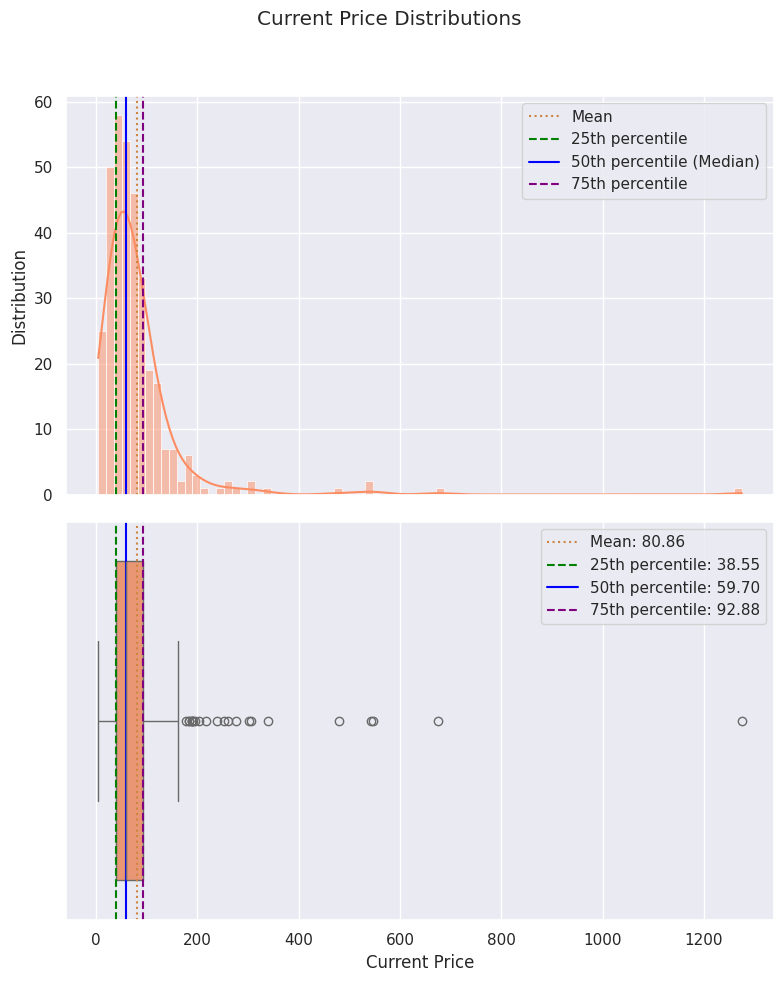

In [88]:
# Draw box plot and histogram to see ditribution of current price
plot_histogram_and_boxplot(trade_ahead_df, 'Current Price', 'Current Price', 'Distribution', 'Current Price Distributions ')

### Observations:
The current price distribution is right-skewed , with a notable elongated right tail and mean > median (59.70) . The average current price is around $80.86

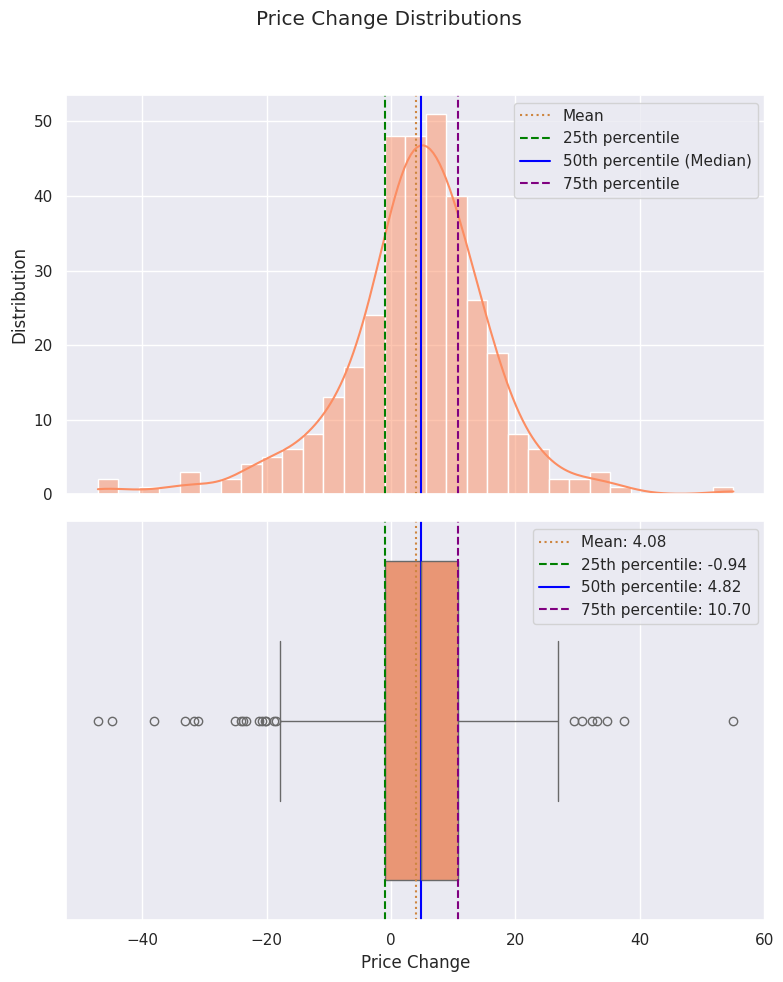

In [89]:
# Draw box plot and histogram to see ditribution of Price Change
plot_histogram_and_boxplot(trade_ahead_df, 'Price Change', 'Price Change', 'Distribution', 'Price Change Distributions ')

### Observations:
The distribution of Price Changes close to normal distribution. Even the mean(4.08) and median (4.82) are near to each other

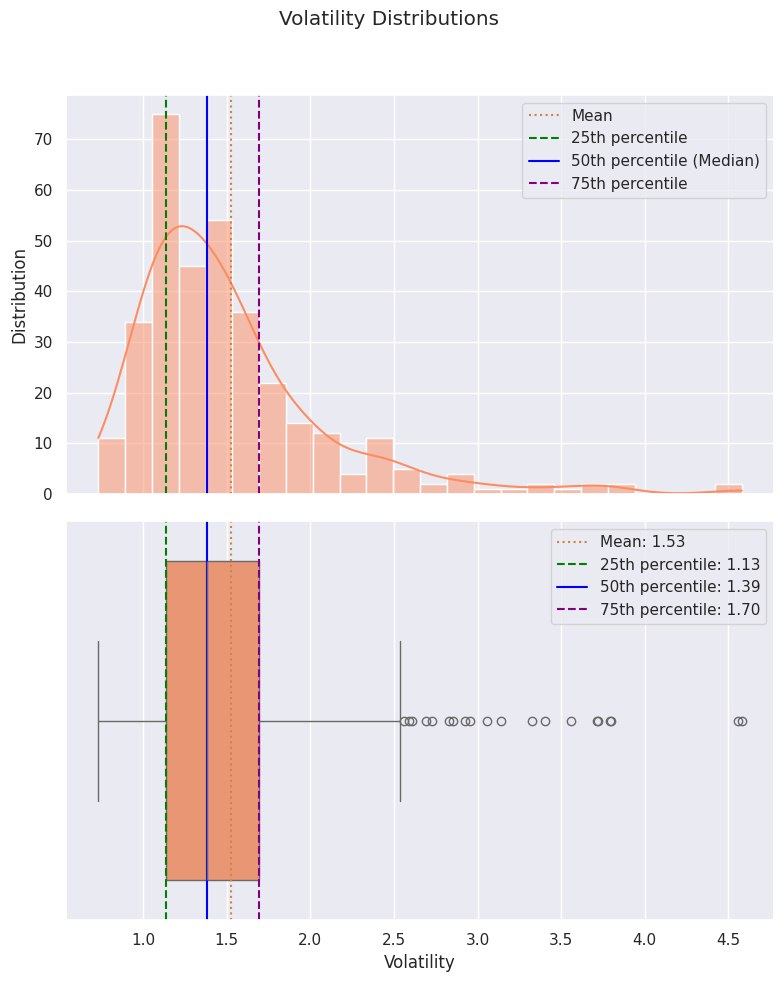

In [90]:
# Draw box plot and histogram to see ditribution of volatility
plot_histogram_and_boxplot(trade_ahead_df, 'Volatility', 'Volatility', 'Distribution', 'Volatility Distributions ')

### Observations:
The distribution of Volatility is right-skewed

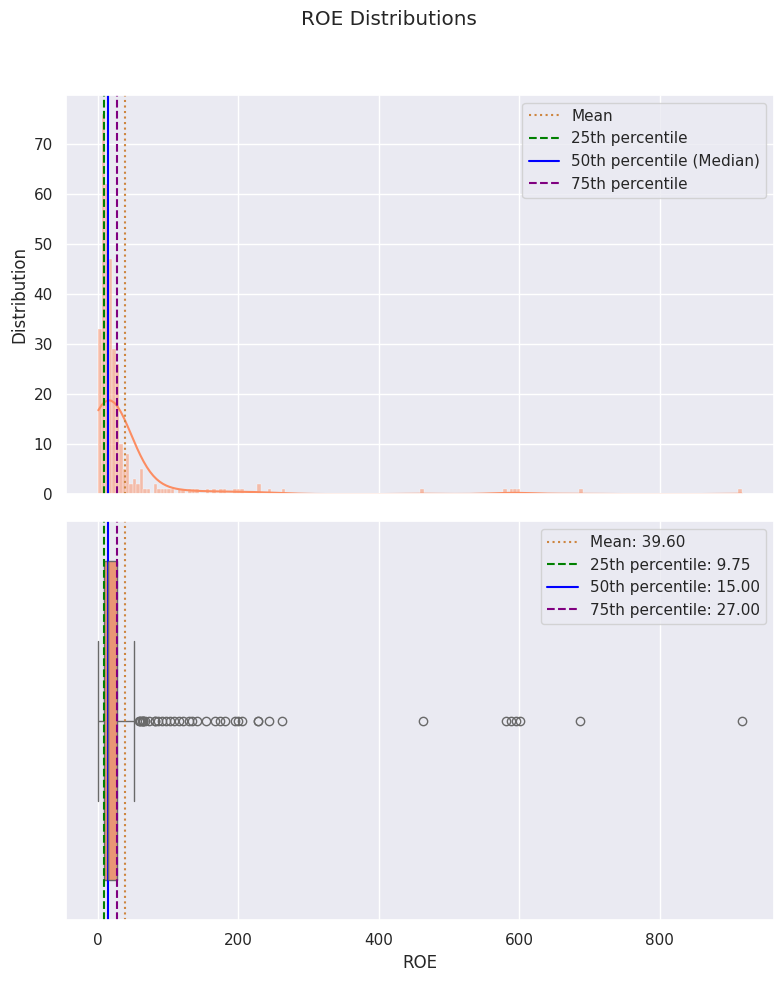

In [91]:
# Draw box plot and histogram to see ditribution of ROE
plot_histogram_and_boxplot(trade_ahead_df, 'ROE', 'ROE', 'Distribution', 'ROE Distributions ')

### Observations:
The distribution of Return on Equity (ROE) is  right-skewed, and most of  the stocks exhibit ROE values below 100.



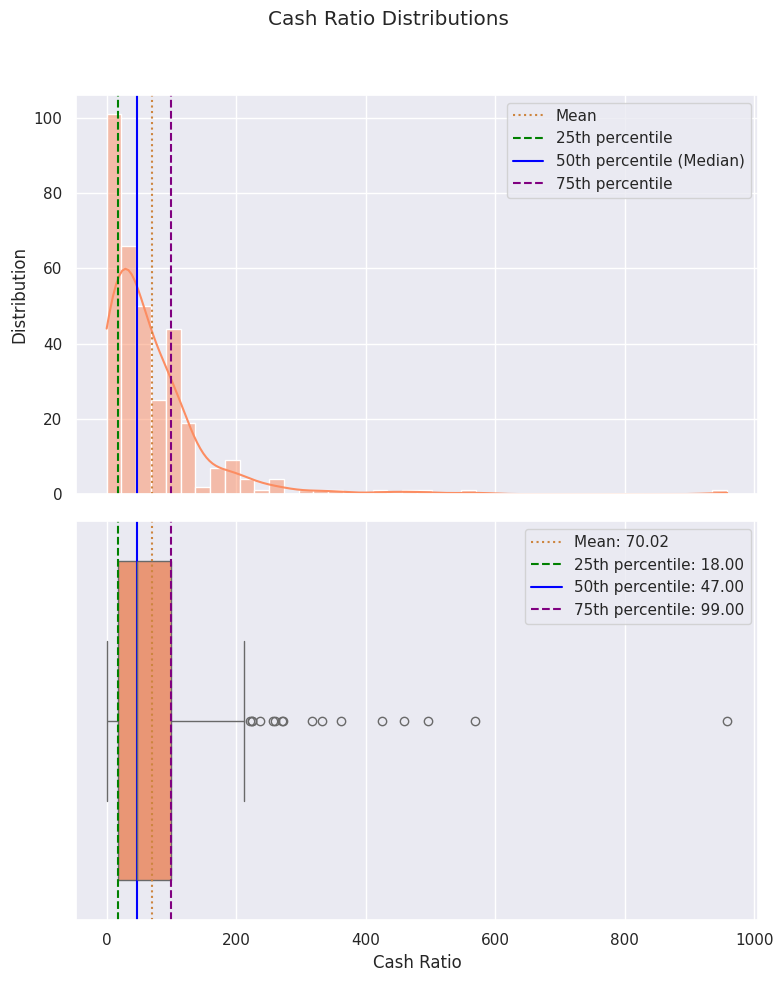

In [92]:
# Draw box plot and histogram to see ditribution of Cash Ratio
plot_histogram_and_boxplot(trade_ahead_df, 'Cash Ratio', 'Cash Ratio', 'Distribution', 'Cash Ratio Distributions ')

### Observations:
The distribution of cash ratios is right-skewed. The distribution has a very long tail to the right and maximum value is near to 1000

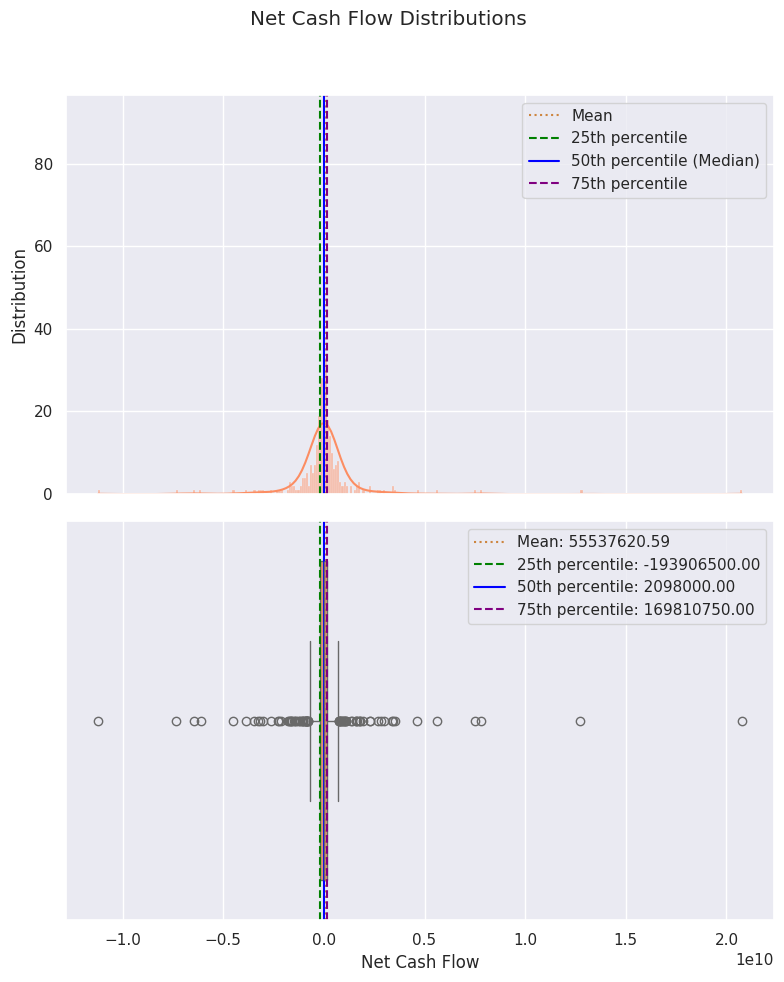

In [93]:
# Draw box plot and histogram to see ditribution of Net Cash Flow
plot_histogram_and_boxplot(trade_ahead_df, 'Net Cash Flow', 'Net Cash Flow', 'Distribution', 'Net Cash Flow Distributions ')

### Observations:
The majority of values in the net cash flow distribution are concentrated within  -193 million to 170 million.

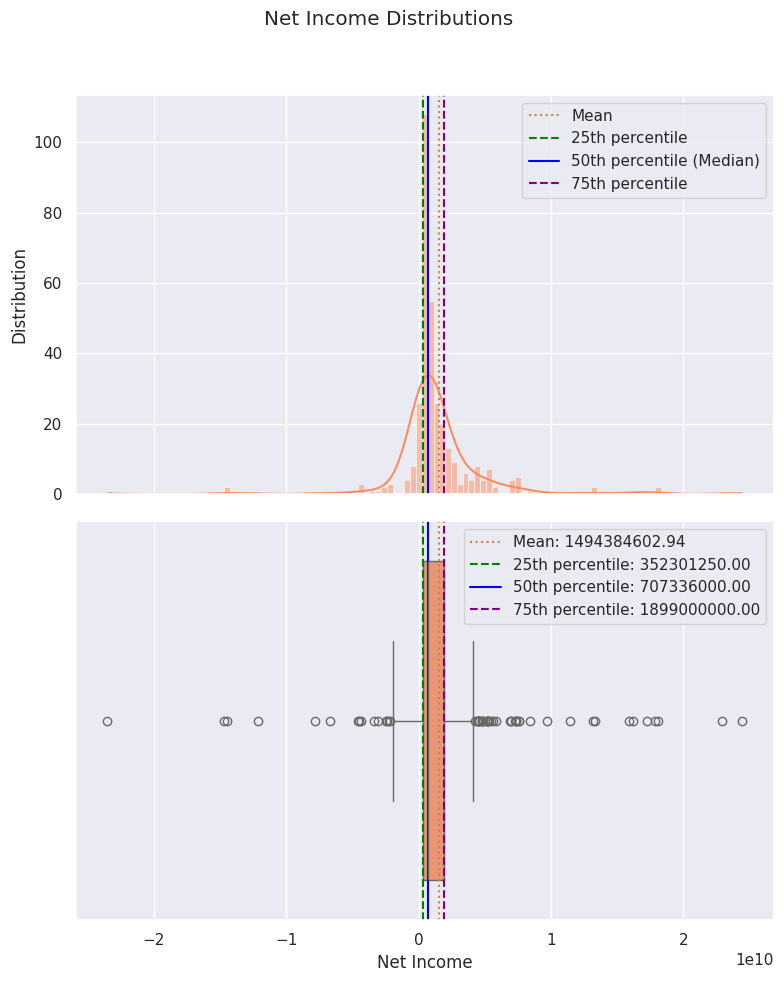

In [94]:
# Draw box plot and histogram to see ditribution of Net Income
plot_histogram_and_boxplot(trade_ahead_df, 'Net Income', 'Net Income', 'Distribution', 'Net Income Distributions ')

### Observations:
 Due to outliers the mean is pulled towards right (mean 1.4billion and median 707 million)

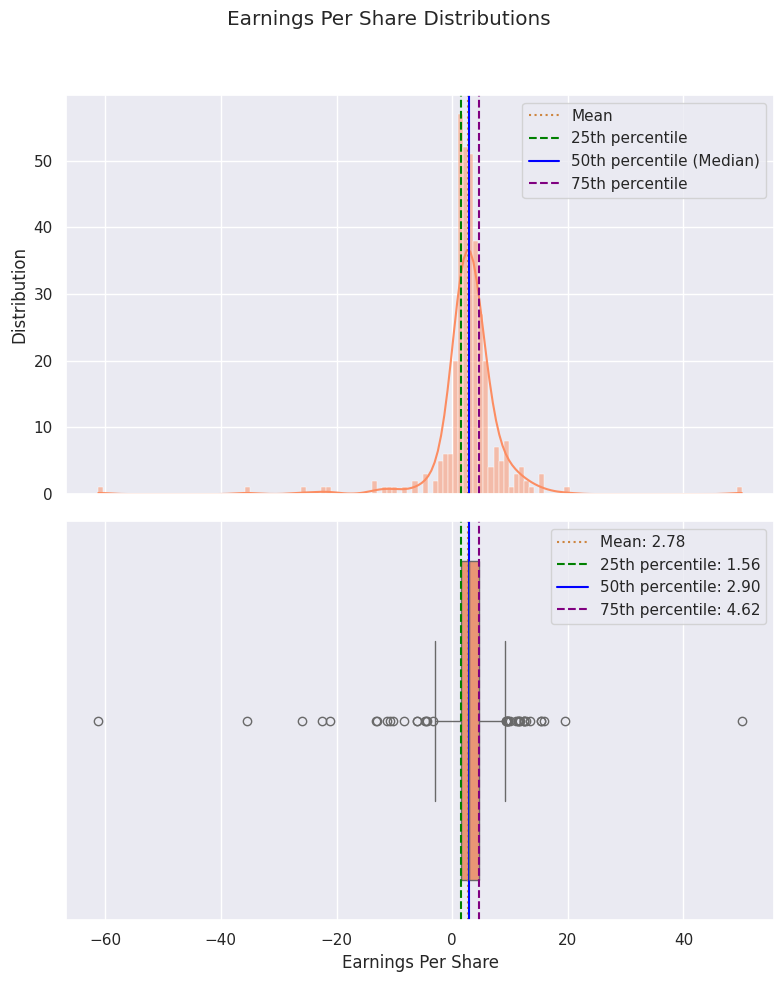

In [95]:
# Draw box plot and histogram to see ditribution of Earnings Per Share
plot_histogram_and_boxplot(trade_ahead_df, 'Earnings Per Share', 'Earnings Per Share', 'Distribution', 'Earnings Per Share Distributions ')

### Observations:
Earnings per share follows a normal distribution

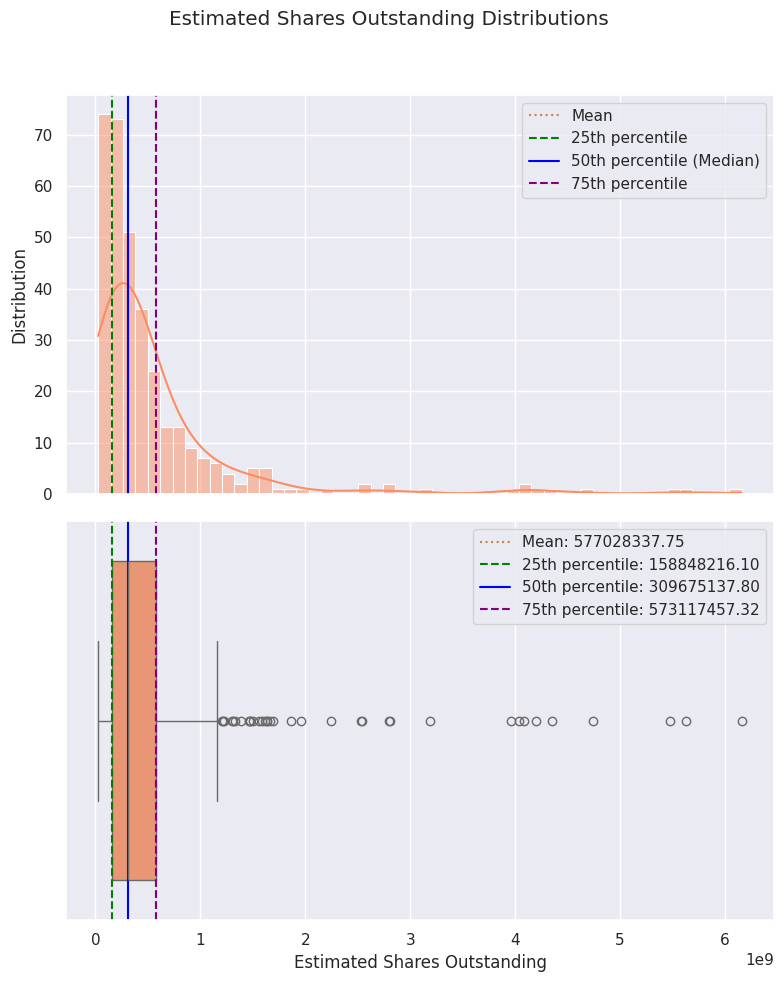

In [96]:
# Draw box plot and histogram to see ditribution of Estimated Shares
plot_histogram_and_boxplot(trade_ahead_df, 'Estimated Shares Outstanding', 'Estimated Shares Outstanding', 'Distribution', 'Estimated Shares Outstanding Distributions ')

### Obersvations:
- The distribution of estimated shares outstanding is right-skewed.
- The majority of companies/entities in this dataset have relatively low shares outstanding.
- A small number of entities with extremely high shares outstanding pull the mean to the right reaching to billions.
- The outliers could represent large corporations or anomalies that need further investigation.


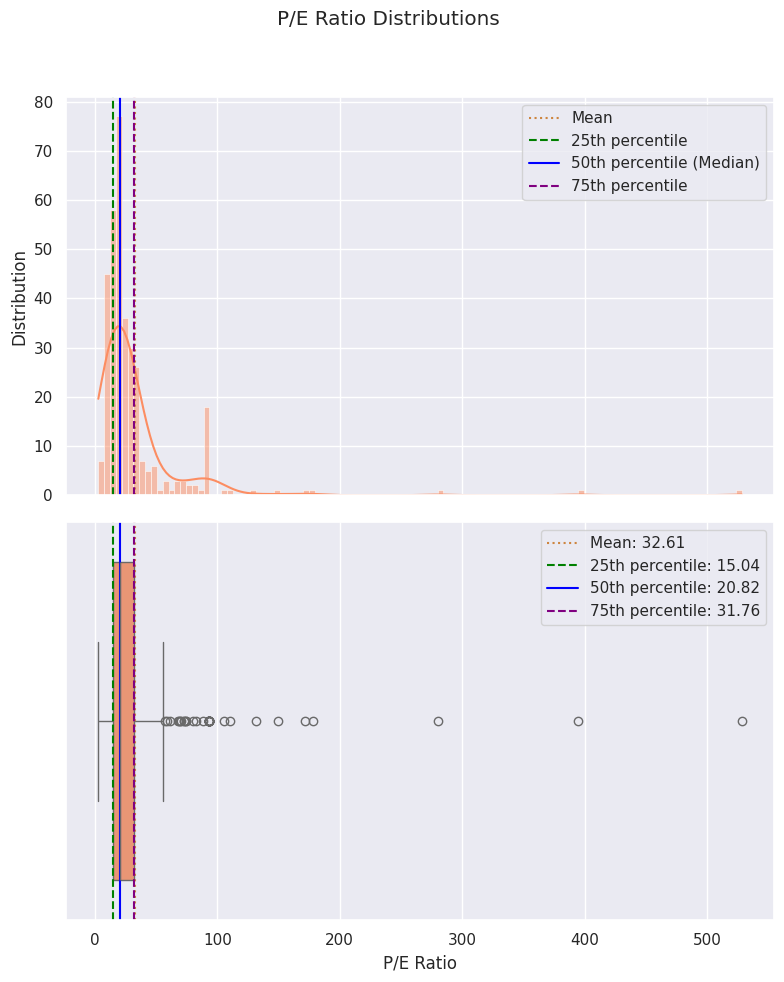

In [97]:
# Draw box plot and histogram to see ditribution of P/E Ratio
plot_histogram_and_boxplot(trade_ahead_df, 'P/E Ratio', 'P/E Ratio', 'Distribution', 'P/E Ratio Distributions ')

### Observations:
The distribution of P/E ratios is right-skewed, with a mean of approximately 32 and  median around 20 .


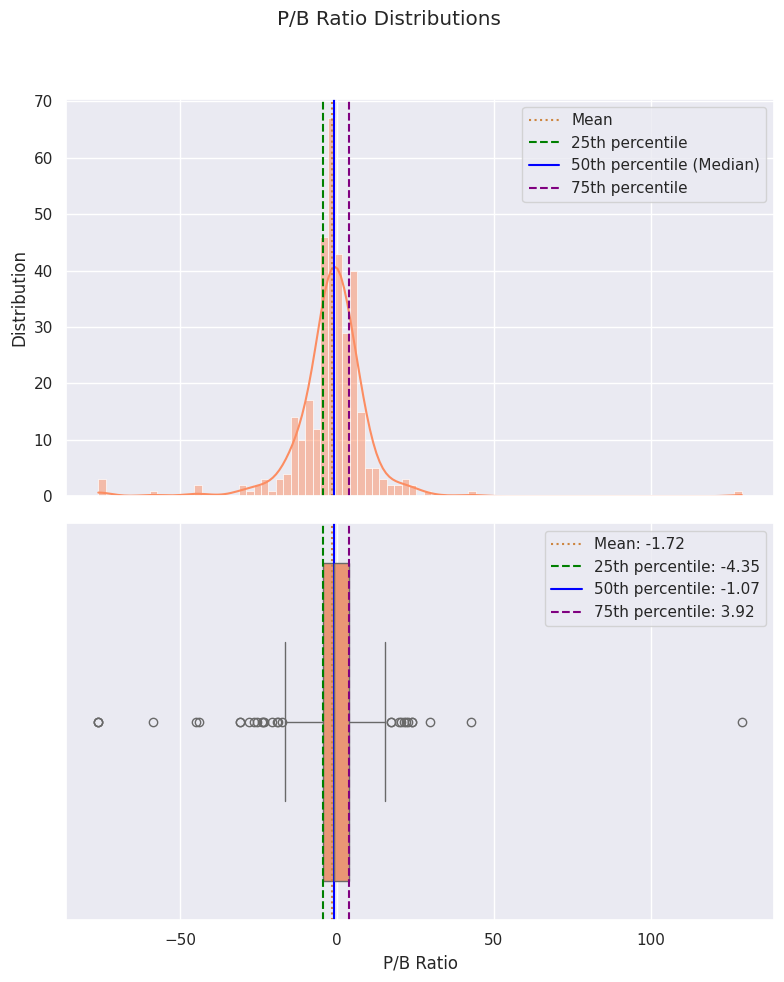

In [98]:
# Draw box plot and histogram to see ditribution of P/B Ratio
plot_histogram_and_boxplot(trade_ahead_df, 'P/B Ratio', 'P/B Ratio', 'Distribution', 'P/B Ratio Distributions ')

### Observations:
- The distribution of P/B ratios looks like normal distributions
-  we have outliers in both side some shares having p/b ratio of near to -80 some are having PB ratio more then 100.
- Majority of shares falls between -4 to 3.92 P/B ratio



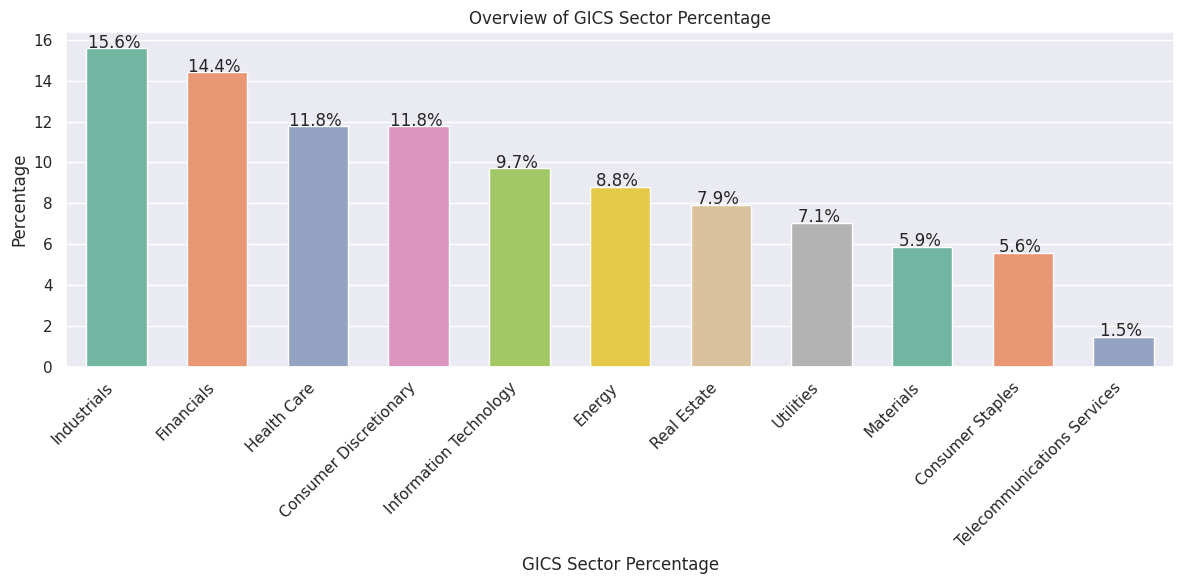

In [99]:
# Bar chart to show sector wise percentage in dataset
plot_bar_chart_percentage(trade_ahead_df, 'GICS Sector', 'GICS Sector Percentage',pellete=pellete)

### Observations:

| **Sector**                    | **Percentage (%)** | **Rank** | **Insight**                                                                                     |
|-------------------------------|--------------------|----------|-------------------------------------------------------------------------------------------------|
| **Industrials**               | 15.6              | 1        | Largest sector, leading in representation.                                                     |
| **Financials**                | 14.4              | 2        | Second largest sector, slightly behind Industrials.                                            |
| **Health Care**               | 11.8              | 3        | Along with Consumer Discretionary, it holds equal weight as the third most significant sector. |
| **Consumer Discretionary**    | 11.8              | 3        | Similar share as Health Care, indicating diverse interests.                                    |
| **Information Technology**    | 9.7               | 5        | Represents the growing impact of tech, though smaller compared to Industrials.                |
| **Energy**                    | 8.8               | 6        | Significant contribution, driven by demand for resources.                                      |
| **Real Estate**               | 7.9               | 7        | Medium-level presence, reflective of global real estate trends.                                |
| **Utilities**                 | 7.1               | 8        | Consistent but less dominant role in the sector.                                               |
| **Materials**                 | 5.9               | 9        | Represents industries like mining and raw material production.                                 |
| **Consumer Staples**          | 5.6               | 10       | Provides essentials but smaller market representation.                                         |
| **Telecommunications Services** | 1.5            | 11       | Smallest sector, indicating low emphasis or niche representation.                              |

Stocks are from 11  industrial sectors.No single sector dominates more than 16% of the dataset. We can see the details in above



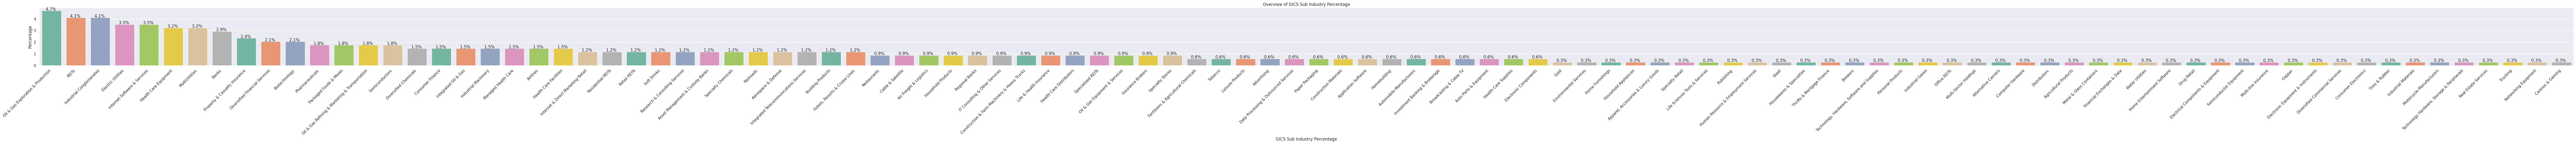

In [100]:
# Bar chart to show industry wise percentage in dataset
plot_bar_chart_percentage(trade_ahead_df, 'GICS Sub Industry', 'GICS Sub Industry Percentage',pellete=pellete,bar_width=0.8)

In [101]:
print(f" Total no of sub industry {trade_ahead_df.groupby('GICS Sub Industry')['GICS Sub Industry'].value_counts().shape[0]}")

 Total no of sub industry 104


In [102]:
# Showing the no of companies of top 10
trade_ahead_df.groupby('GICS Sub Industry')['GICS Sub Industry'].value_counts().sort_values(ascending=False).head(10)

,count
GICS Sub Industry,
Oil & Gas Exploration & Production,16
REITs,14
Industrial Conglomerates,14
Internet Software & Services,12
Electric Utilities,12
MultiUtilities,11
Health Care Equipment,11
Banks,10
Property & Casualty Insurance,8


### Observations:
There are 104 distinct sub-industries in total. Among them, **Oil and Gas** has the highest number of stocks (16), followed by **REITs** and **Industrial Conglomerates**, each with 14. This is followed by **Internet Software & Services** and **Electric Utilities**, both with 12 stocks. Additionally, **Multi-Utilities** and **Health Care Equipment** each have 11 stocks, while there are around 10 stocks in the **Banking** sector.Other stocks are below 10.

### EDA Bivariate Analysis

#### Sector Vs Price Change Vs Current Price Vs Volatility

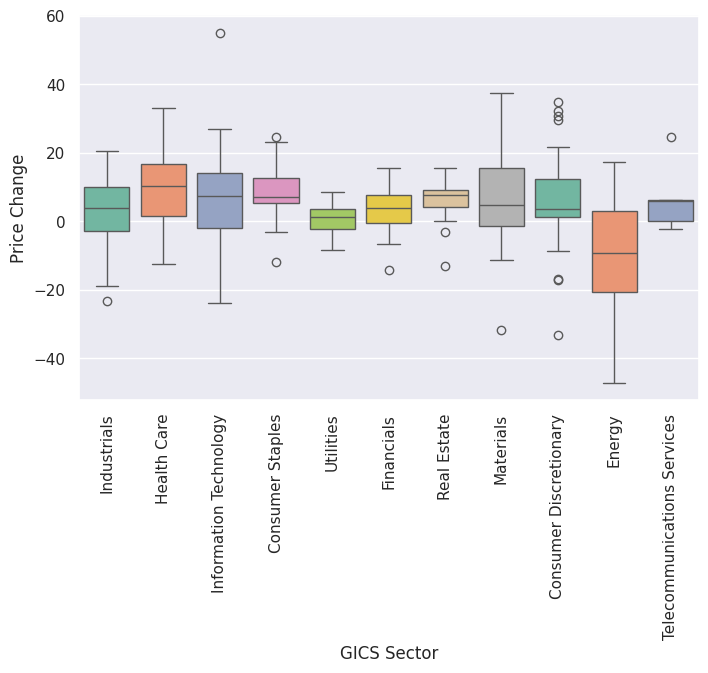

In [103]:
# Box Plot for differnet Sector and price change
plot_boxplot(trade_ahead_df, 'GICS Sector', 'Price Change');

### Observations:
- The Energy sector is the most volatile, making it potentially risky but offering opportunities for significant returns.
- Utilities, Financials, and Consumer Staples are relatively stable and likely appealing to risk-averse investors.

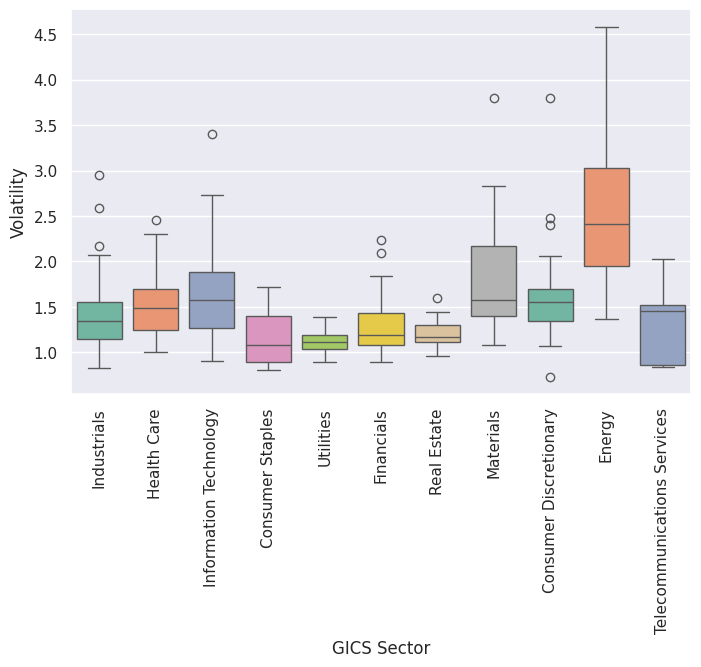

In [104]:
# Box plot to understand distribution of volatility across sectors
plot_boxplot(trade_ahead_df, 'GICS Sector', 'Volatility');

### Obsevations:
- We can see same kind trend on volatility like above.Energy sector is highly volatile .
- Compared to other sectors, the Telecommunications Services sector has low median volatility and a narrow IQR.This has lowest volatility among other sectors

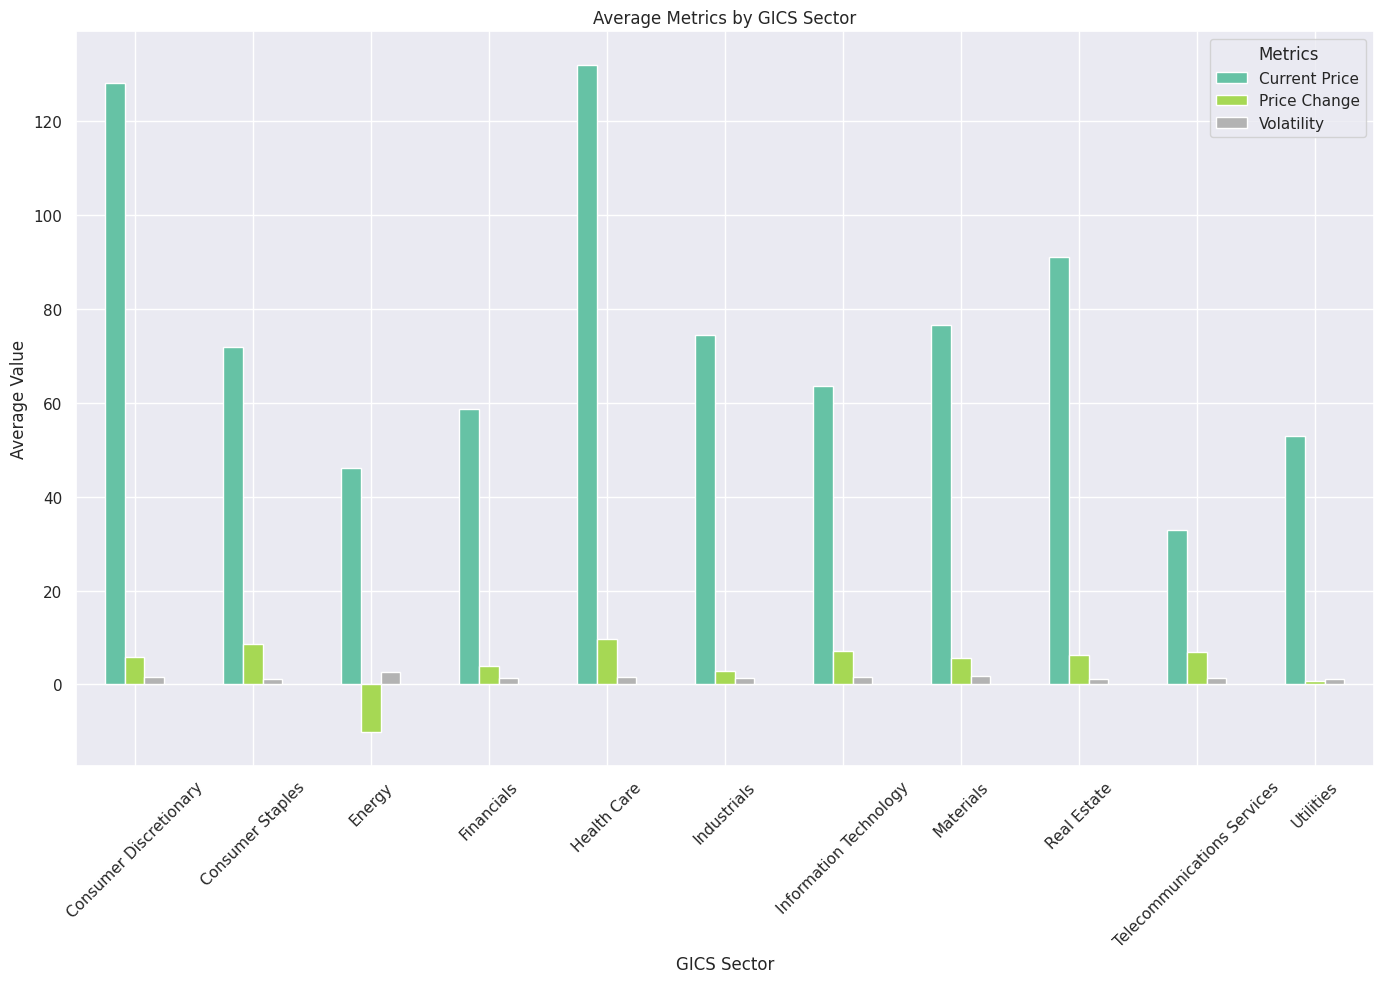

In [121]:
#Plot Bar chart on avg metrics (current price price change and Volatility)
plot_avg_metrics_by_category(trade_ahead_df,'GICS Sector',['Current Price','Price Change','Volatility'],'Average Metrics by GICS Sector','GICS Sector','Average Value')

### Observations:
- Energy is a high-risk  with both significant price changes and elevated volatility.
- Health Care and Information Technology seem to offer a balance of high current prices and moderate price changes, indicating they might be good choices for stable investments with growth potential.
- Utilities and Telecommunications Services are stable, low-volatility sectors, likely appealing to conservative investors prioritizing consistency over large gains.

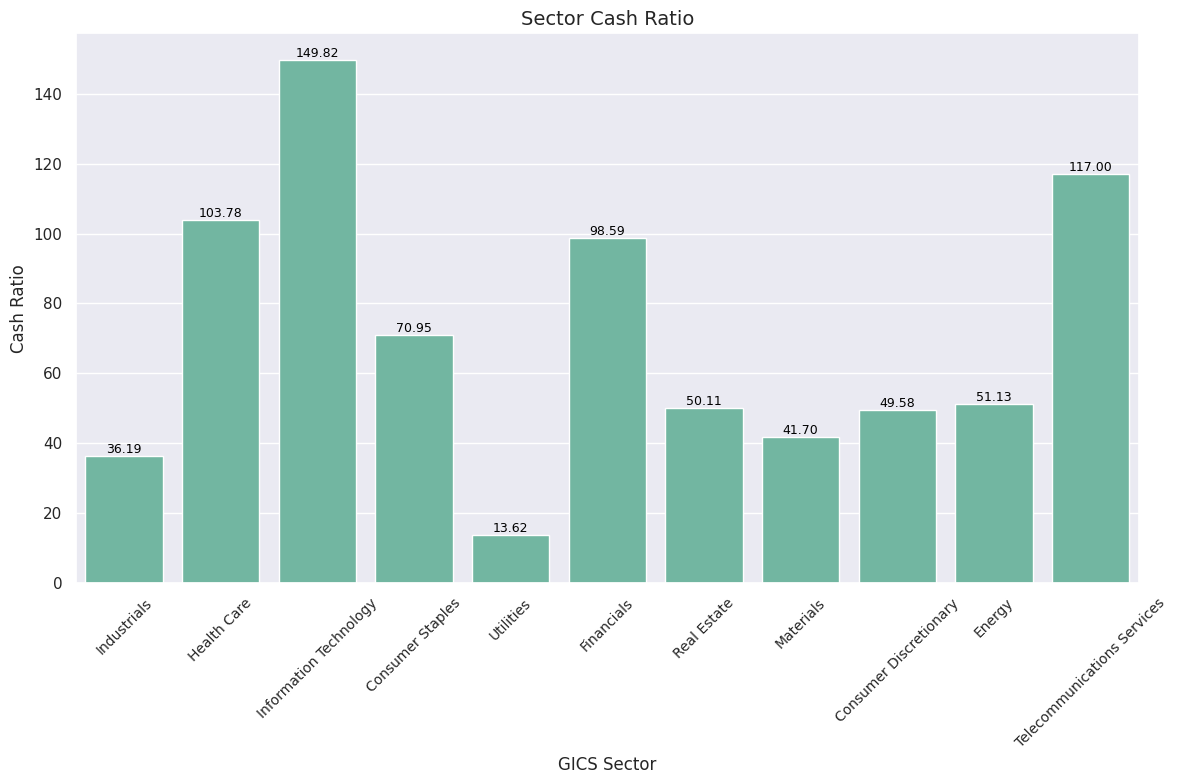

In [107]:
# Bar plot of cash ratio each sector has
plot_barplot(data=trade_ahead_df, x='GICS Sector', y='Cash Ratio',title='Sector Cash Ratio',color=colors[0],figsize=(12,8))

### Observations:
- Top three Sectors which has high reservations of cash
  1.   Information Technology 150
  2.   Telecommunication  Services  117
  3.   Helath Care 103
- Bottom 3 having least Reservations of cash
  1. Utilities: 13
  2. Industrials: 36
  3. Materials: 41.70



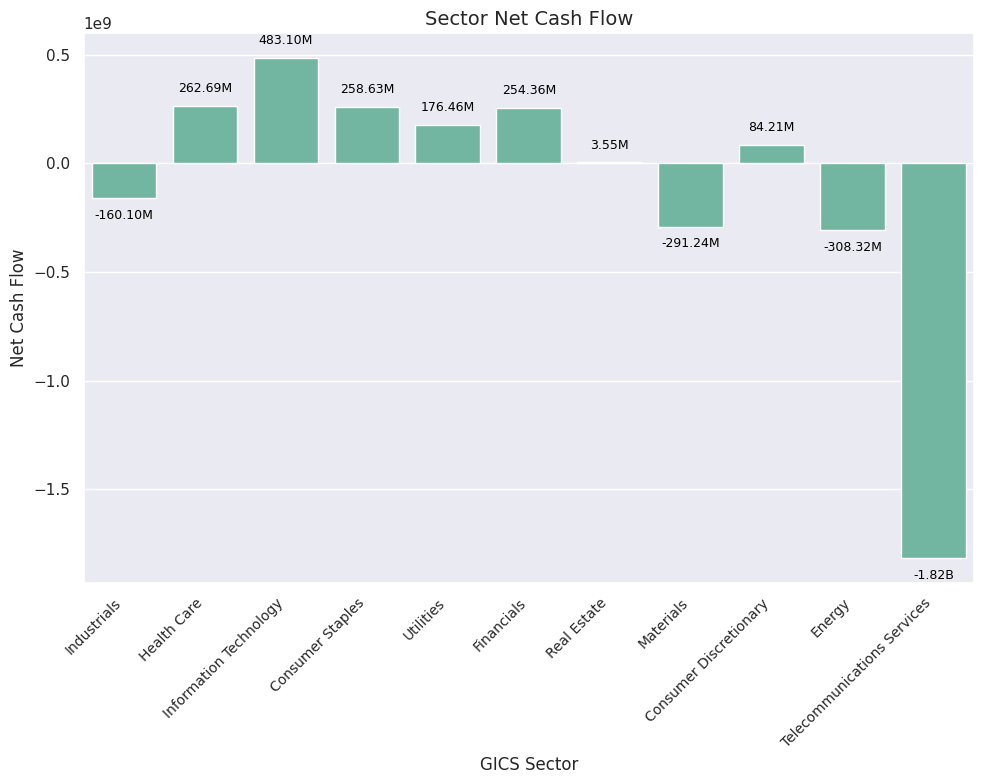

In [116]:
# Bar Plot on Net Cash Flow for each sector
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Net Cash Flow',title='Sector Net Cash Flow',color=colors[0],figsize=(10,8))

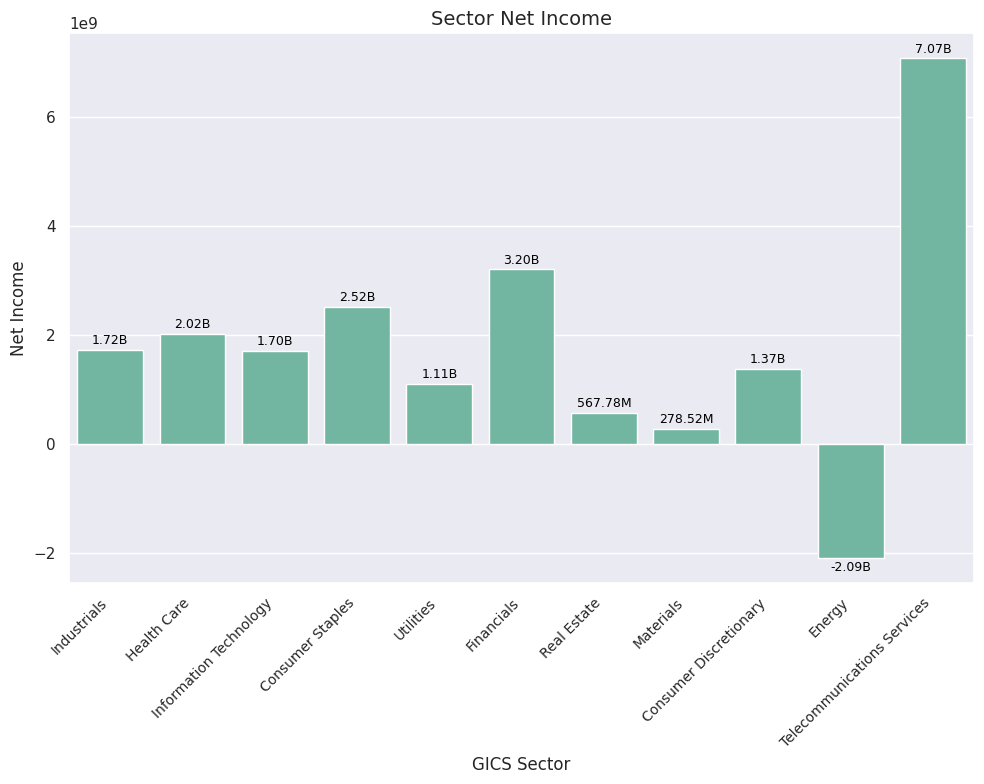

In [115]:
# Bar plot for Net income across each sector
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Net Income',title='Sector Net Income',color=colors[0],figsize=(10,8))

In [124]:
# Sectors Mean earning share
trade_ahead_df.groupby('GICS Sector')['Earnings Per Share'].mean()

,Earnings Per Share
GICS Sector,
Consumer Discretionary,4.53
Consumer Staples,3.22
Energy,-6.91
Financials,4.22
Health Care,4.54
Industrials,4.46
Information Technology,2.27
Materials,3.13
Real Estate,2.34


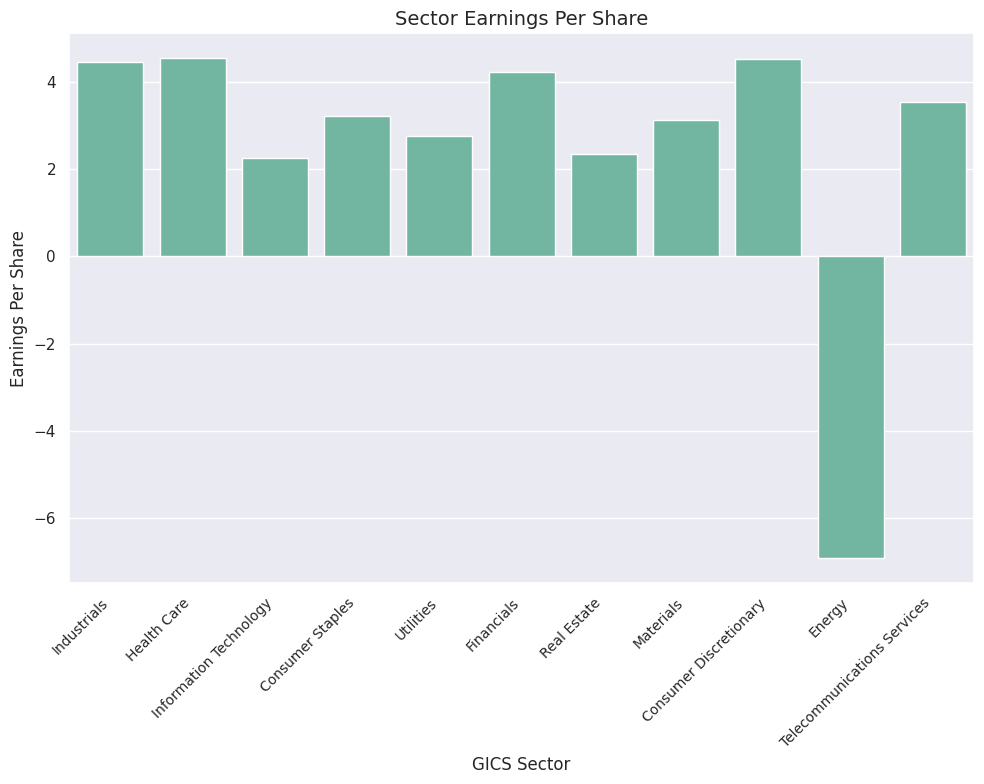

In [129]:
# Bar Plot Sectors Earning per share
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Earnings Per Share',title='Sector Earnings Per Share',color=colors[0],figsize=(10,8))

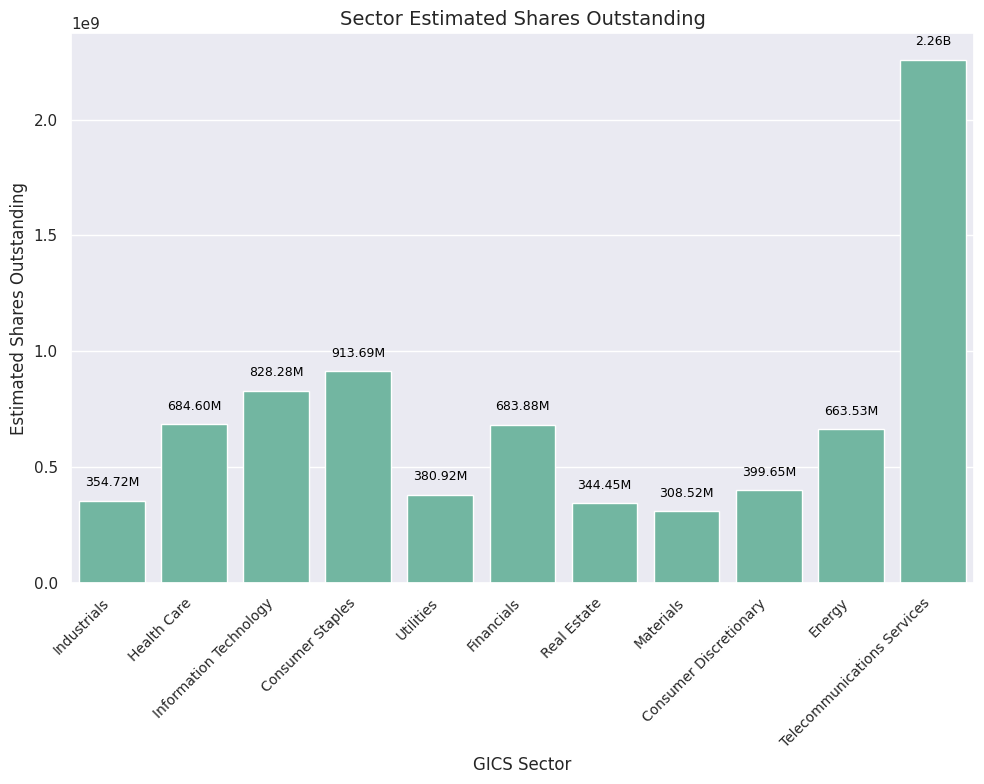

In [131]:
# Bar plot on estimated shares outstanding
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Estimated Shares Outstanding',title='Sector Estimated Shares Outstanding',color=colors[0],figsize=(10,8))

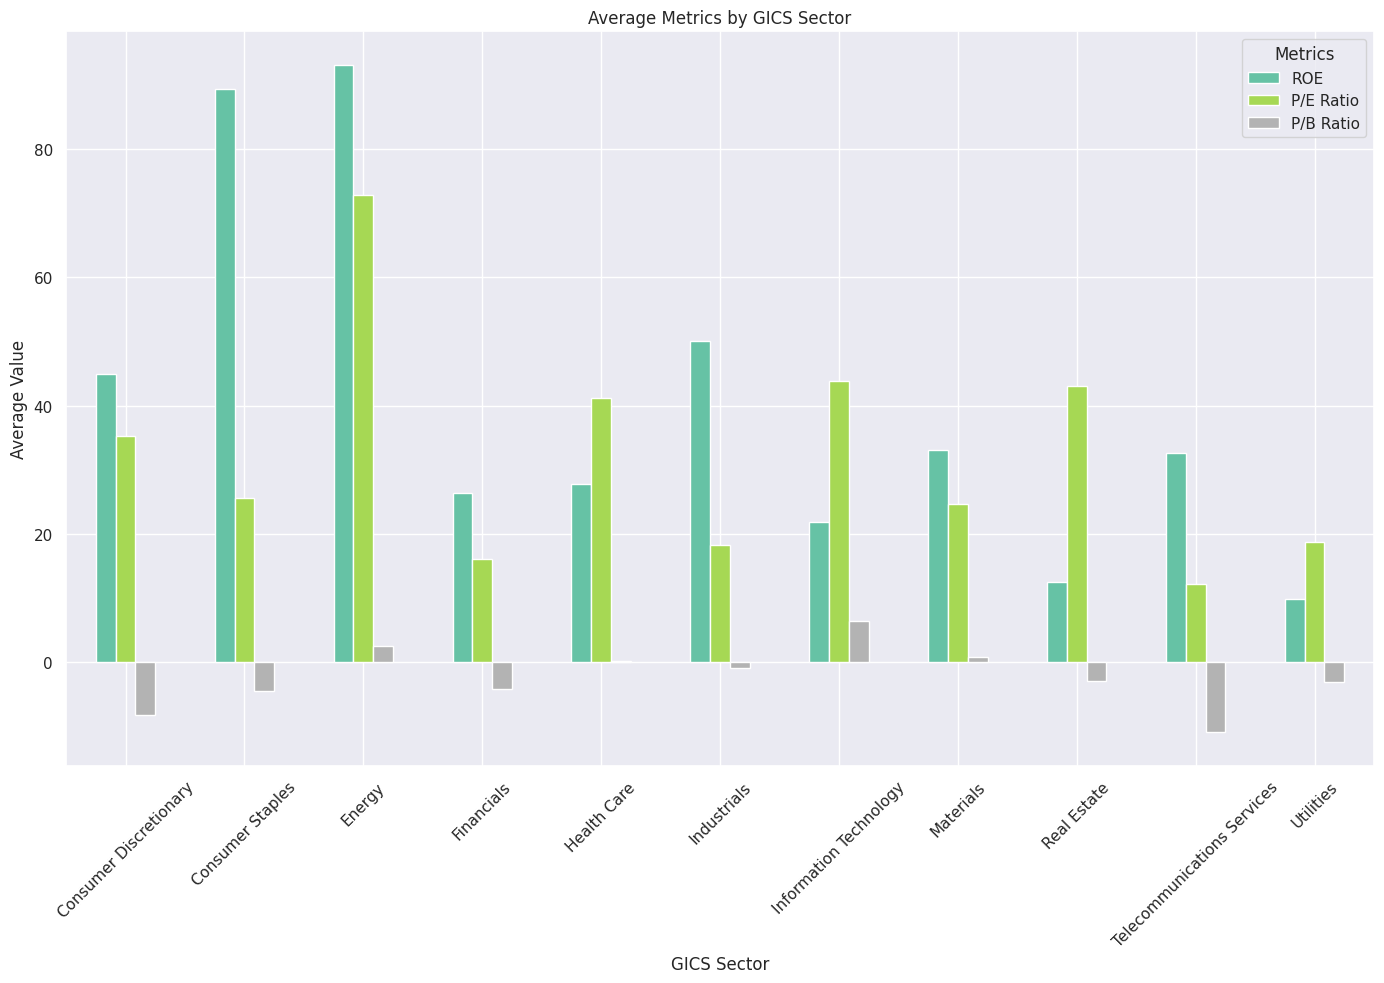

In [126]:
# Compare ROE P/E and P/B ration across sectors
plot_avg_metrics_by_category(trade_ahead_df,'GICS Sector',['ROE','P/E Ratio','P/B Ratio'],'Average Metrics by GICS Sector','GICS Sector','Average Value')

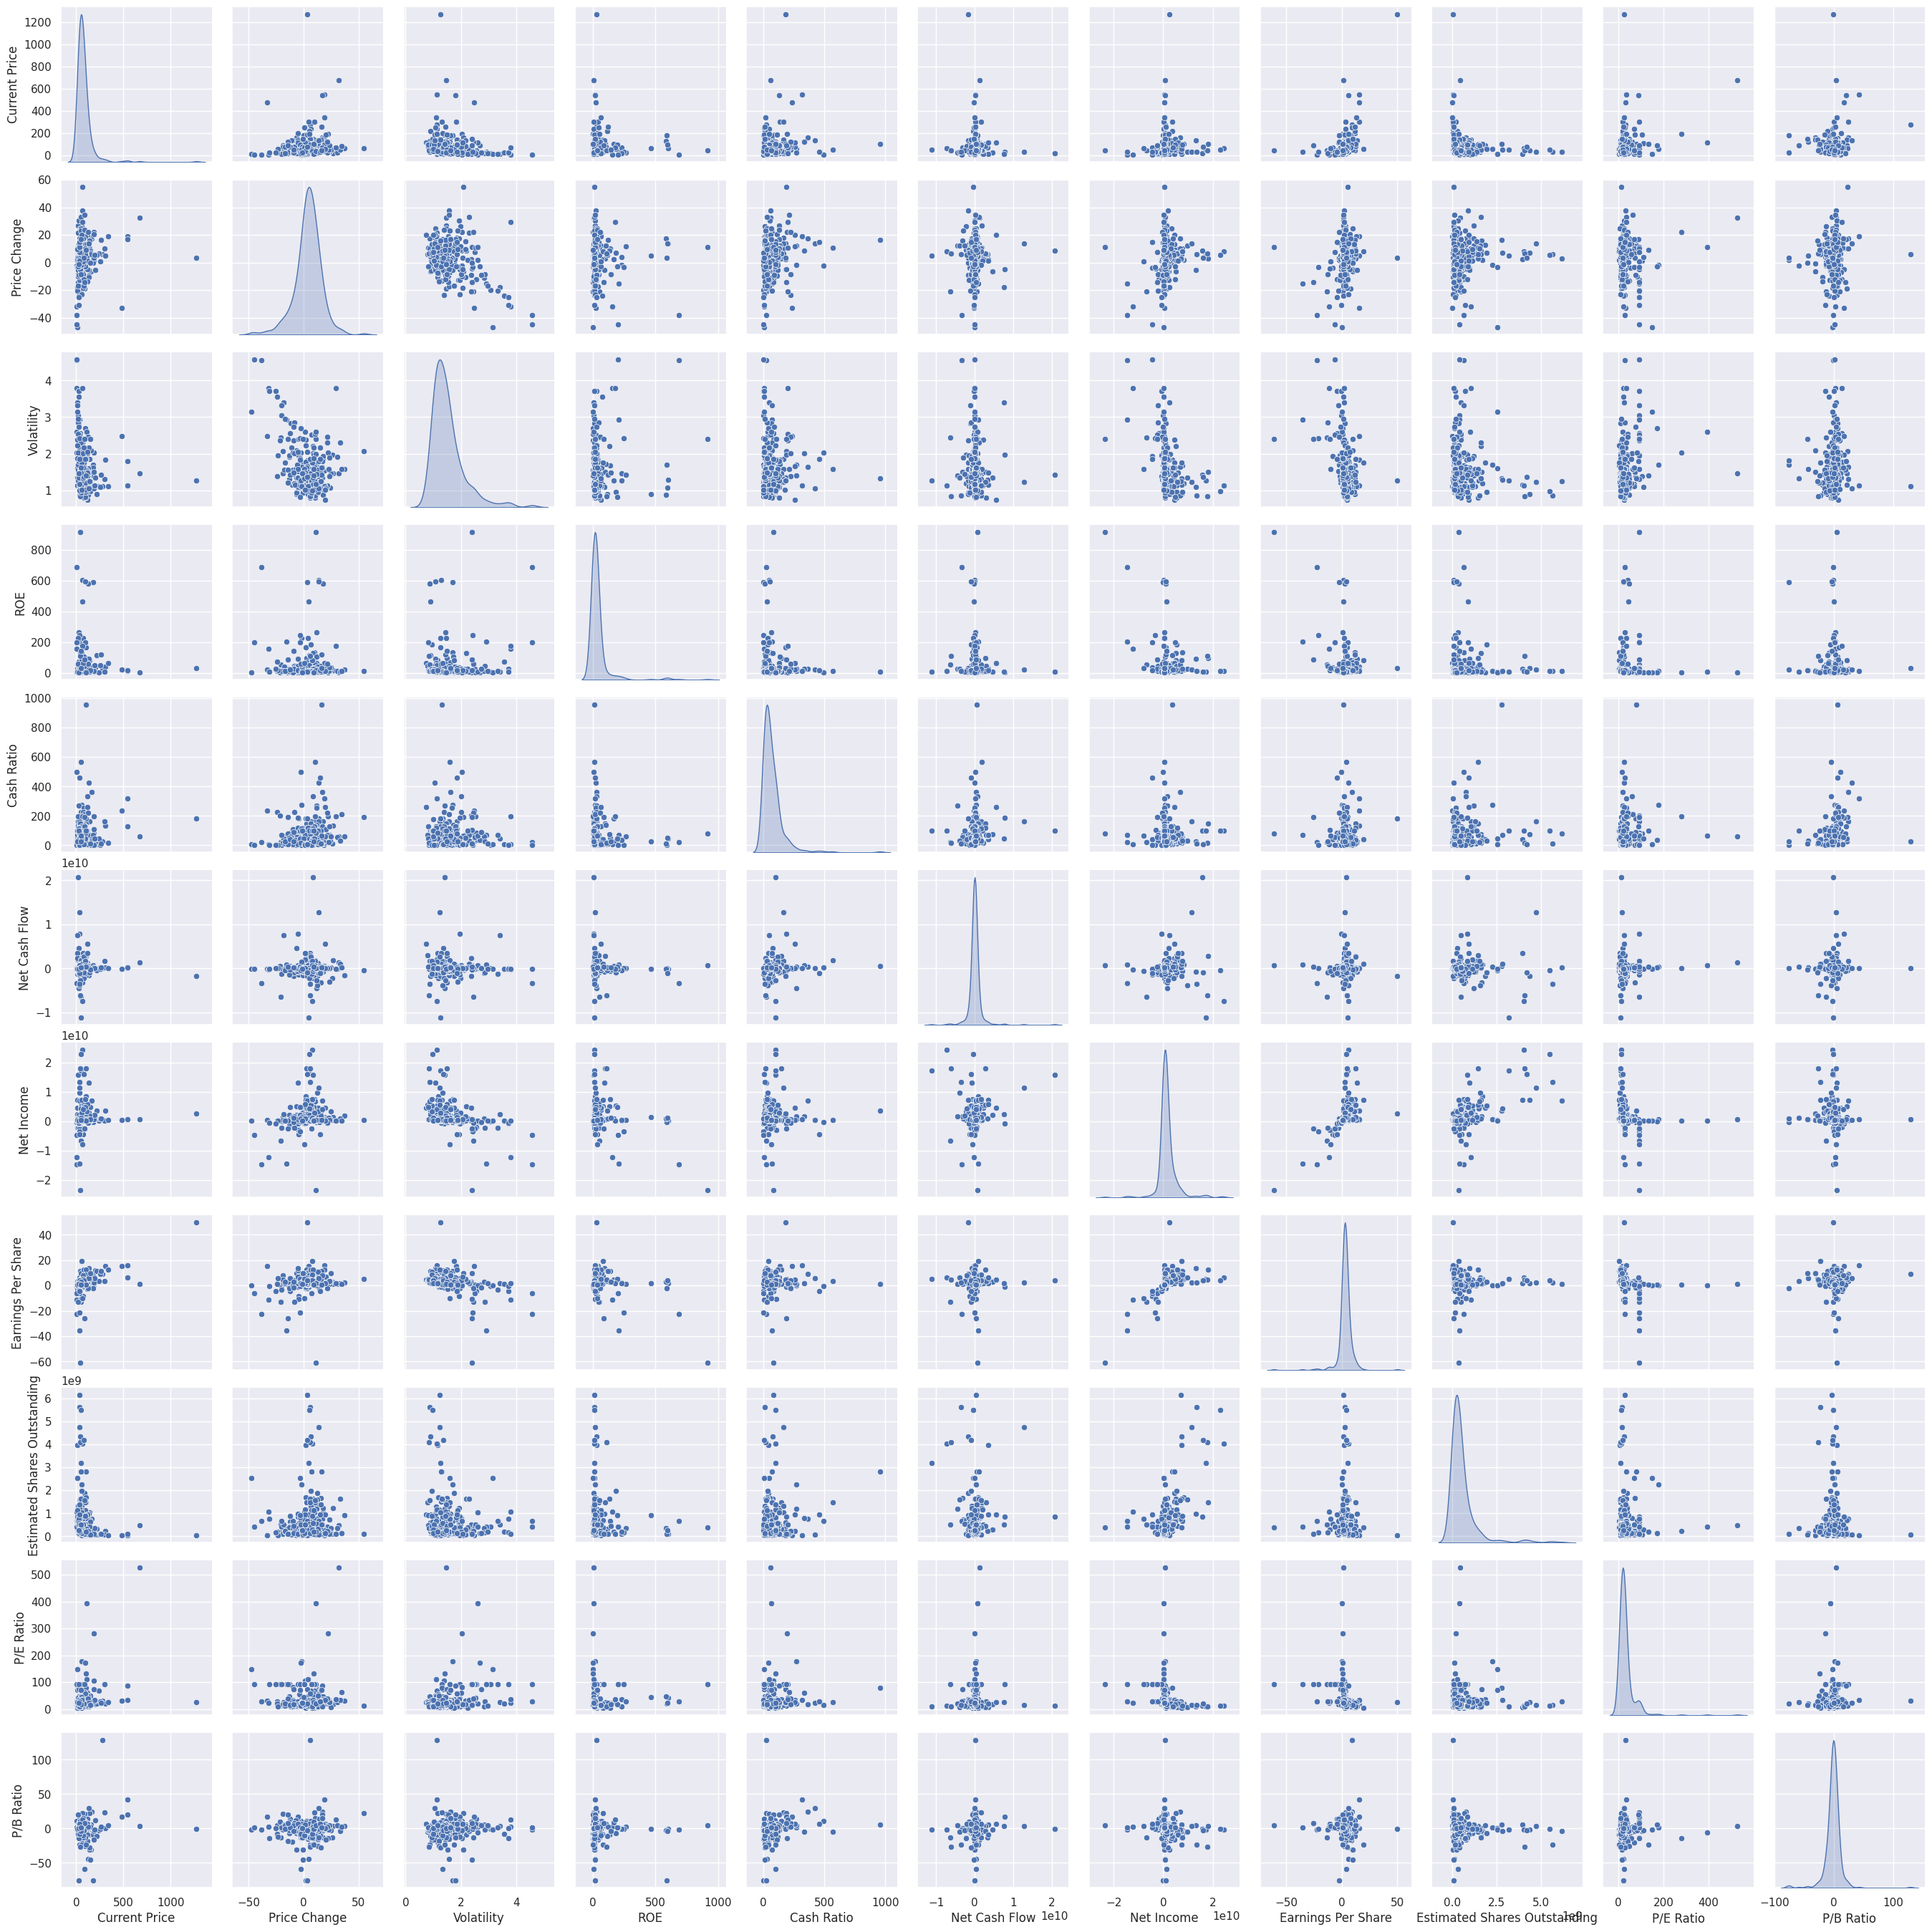

In [109]:
# Pair Plot across all the numerical values
sns.pairplot(trade_ahead_df[trade_ahead_df.select_dtypes(include=np.number).columns],diag_kind='kde',palette=pellete);

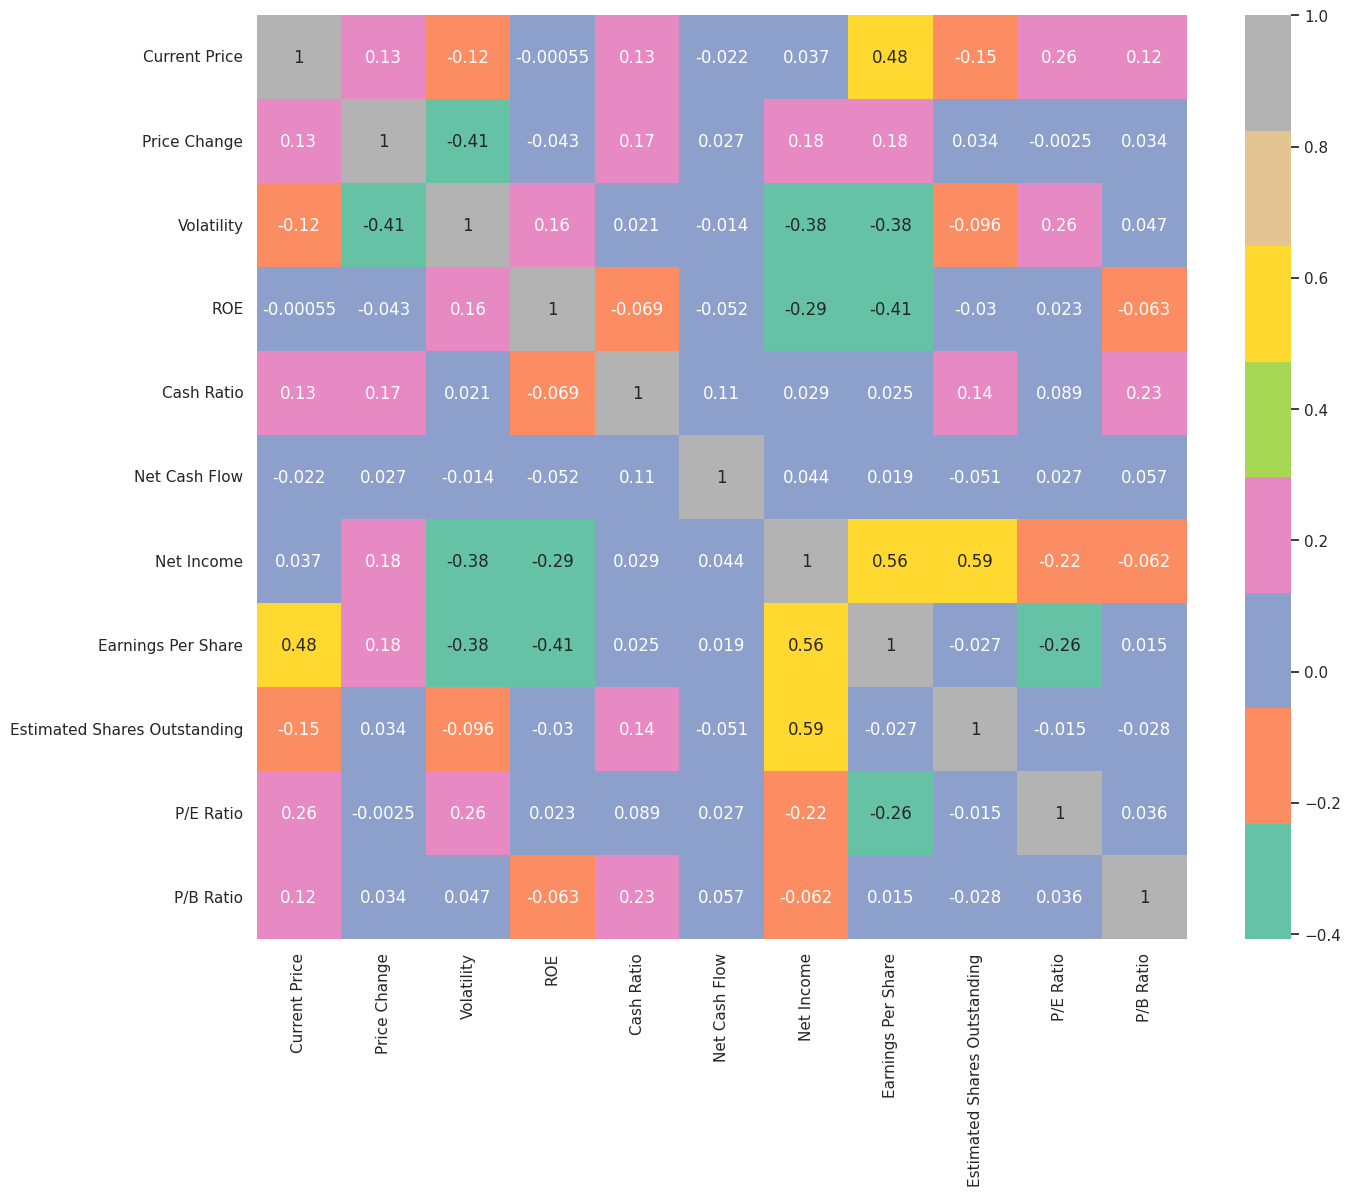

In [135]:
# Heat map to visualize the corelation
plt.figure(figsize=(15, 12))  #  the size
sns.heatmap(trade_ahead_df.select_dtypes(include="number").corr(),annot=True,cmap=pellete);